# Importing Required Libraries

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
boston_dataset = load_boston()

In [3]:
X_data = boston_dataset.data
Y_data = boston_dataset.target

# Data Preprocessing and Visualization

In [4]:
X_data = pd.DataFrame(data = X_data, columns=boston_dataset.feature_names)
X_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
X_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
u = X_data.mean(axis=0)
std = X_data.std(axis=0)
X_data = (X_data - u)/std

In [8]:
X0 = np.ones((X_data.shape[0],1))
X_data = np.hstack((X0,X_data))

# Writing The required functions to calcuate hypothesis function, error and gradient and finaly finding theta with Gradient Descent

In [9]:
def hypothesis(x, theta):
    y_ = 0
    n = theta.shape[0]
    for i in range(n):
        y_ += theta[i] * x[i]
    return y_

def gradient(X_data, Y_data, theta):
    m = X_data.shape[0]
    n = theta.shape[0]
    grad = np.zeros((n,))
    for i in range(n):
        for j in range(m):
            grad[i] += (hypothesis(X_data[j],theta) - Y_data[j])*X_data[j][i]
    return grad/m

def error(X_data, Y_data, theta):
    error = 0
    m = X_data.shape[0]
    for i in range(m):
        y_ = hypothesis(X_data[i],theta) 
        error += (y_ - Y_data[i])**2
    return error/m

def gradientDescent(X_data, Y_data, max_steps = 300, learning_rate = 0.1):
    m = X_data.shape[0]
    n = X_data.shape[1]
    error_list = []
    theta = np.zeros((n,))
    for i in range(max_steps):
        grad = gradient(X_data, Y_data, theta)
        e = error(X_data, Y_data, theta)
        error_list.append(e)
        for j in range(n):
            theta[j] = theta[j] - (learning_rate * grad[j])
    return theta, error_list

In [10]:
theta, error_list = gradientDescent(X_data, Y_data)

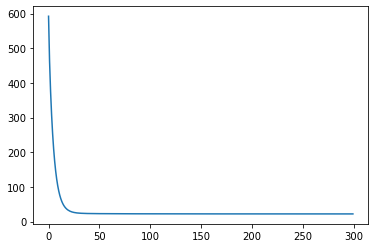

In [11]:
plt.plot(error_list)

In [12]:
Y_pred = np.dot(X_data,theta)

# Getting the Accuracy of the Model using R2score

In [13]:
def r2score(Y_,Y):
    num = np.sum((Y-Y_)**2)
    den = np.sum((Y-Y.mean())**2)
    return (1 - (num/den))*100
r2score(Y_pred, Y_data)

74.04526884082144

# Vectorized Implementation

In [14]:
def hypothesis_vectorized(X_data, theta):
    return np.dot(X_data, theta)

def gradient_vectorized(X_data, Y_data, theta):
    m = X_data.shape[0]
    Y_ = hypothesis_vectorized(X_data, theta)
    grad = np.dot(X_data.T,(Y_ - Y_data))
    return grad/m

def error_vectorized(X_data, Y_data, theta):
    m = X_data.shape[0]
    Y_ = hypothesis_vectorized(X_data, theta)
    error = np.sum((Y_-Y_data)**2)
    return error/m

def gradientDescent_vectorized(X_data, Y_data, max_steps = 300, learning_rate = 0.1):
    n = X_data.shape[1]
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_steps):
        error = error_vectorized(X_data, Y_data, theta)
        grad = gradient_vectorized(X_data, Y_data, theta)
        error_list.append(error)
        theta = theta - (learning_rate * grad)
    return theta, error_list

In [15]:
theta, error_list = gradientDescent_vectorized(X_data, Y_data)

In [16]:
Y_vectorized_pred = hypothesis_vectorized(X_data, theta)
r2score(Y_vectorized_pred, Y_data)

74.04526884082144

# Verifying the Model's Predictions with sklearn

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_data, Y_data)

LinearRegression()

In [19]:
Y_sklearn_pred = lr.predict(X_data)

In [20]:
lr.score(X_data, Y_data)

0.7406426641094095